In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/facechallenge/test_Bh8pGW3/test.csv
/kaggle/input/facechallenge/test_Bh8pGW3/Test/25540.jpg
/kaggle/input/facechallenge/test_Bh8pGW3/Test/20529.jpg
/kaggle/input/facechallenge/test_Bh8pGW3/Test/10304.jpg
/kaggle/input/facechallenge/test_Bh8pGW3/Test/10730.jpg
/kaggle/input/facechallenge/test_Bh8pGW3/Test/22608.jpg
/kaggle/input/facechallenge/test_Bh8pGW3/Test/7737.jpg
/kaggle/input/facechallenge/test_Bh8pGW3/Test/10054.jpg
/kaggle/input/facechallenge/test_Bh8pGW3/Test/3919.jpg
/kaggle/input/facechallenge/test_Bh8pGW3/Test/6197.jpg
/kaggle/input/facechallenge/test_Bh8pGW3/Test/10924.jpg
/kaggle/input/facechallenge/test_Bh8pGW3/Test/21494.jpg
/kaggle/input/facechallenge/test_Bh8pGW3/Test/24752.jpg
/kaggle/input/facechallenge/test_Bh8pGW3/Test/25184.jpg
/kaggle/input/facechallenge/test_Bh8pGW3/Test/9960.jpg
/kaggle/input/facechallenge/test_Bh8pGW3/Test/19798.jpg
/kaggle/input/facechallenge/test_Bh8pGW3/Test/3417.jpg
/kaggle/input/facechallenge/test_Bh8pGW3/Test/7894.jpg
/kag

In [2]:
import numpy as np
import pandas as pd
from keras.preprocessing import image

from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input,decode_predictions
from keras.layers import Input, Conv2D, MaxPool2D, Dense, Flatten
from keras.models import Model
from keras.utils import to_categorical

from keras.preprocessing.image import ImageDataGenerator

In [3]:
train_df=pd.read_csv('../input/facechallenge/train_DETg9GD/train.csv')
####
test_df=pd.read_csv('../input/facechallenge/test_Bh8pGW3/test.csv')

In [4]:
train_df.head()

,ID,Class
0,377.jpg,MIDDLE
1,17814.jpg,YOUNG
2,21283.jpg,MIDDLE
3,16496.jpg,YOUNG
4,4487.jpg,MIDDLE


In [5]:
train_datagen = ImageDataGenerator(rescale=1./255,
    #shear_range=0.2,
    #zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=25,
    #fill_mode='reflect',
    validation_split=0.25)

train_generator=train_datagen.flow_from_dataframe(dataframe=train_df,
                                            directory="../input/facechallenge/train_DETg9GD/Train/",
                                            x_col="ID",
                                            y_col="Class",
                                            subset="training",
                                            batch_size=86,
                                            seed=42,
                                            shuffle=True,
                                            class_mode="categorical",
                                            target_size=(86, 86))

validation_dataset=train_datagen.flow_from_dataframe(dataframe=train_df,
                                            directory="../input/facechallenge/train_DETg9GD/Train/",
                                            x_col="ID",
                                            y_col="Class",
                                            subset="validation",
                                            batch_size=86,
                                            seed=42,
                                            shuffle=True,
                                            class_mode="categorical",
                                            target_size=(86, 86))



test_datagen = ImageDataGenerator(samplewise_center=True,)
        # shear_range=0.2,
        # zoom_range=0.2,
        # horizontal_flip=True,
        # width_shift_range=0.1,
        # height_shift_range=0.1

test_generator=test_datagen.flow_from_dataframe(dataframe=test_df,
                                            directory="../input/facechallenge/test_Bh8pGW3/Test/",
                                            x_col='ID',
                                            y_col=None,
                                            batch_size=1,
                                            seed=42,
                                            shuffle=False,
                                            class_mode=None,
                                            target_size=(86, 86))



Found 14930 validated image filenames belonging to 3 classes.
Found 4976 validated image filenames belonging to 3 classes.
Found 6636 validated image filenames.


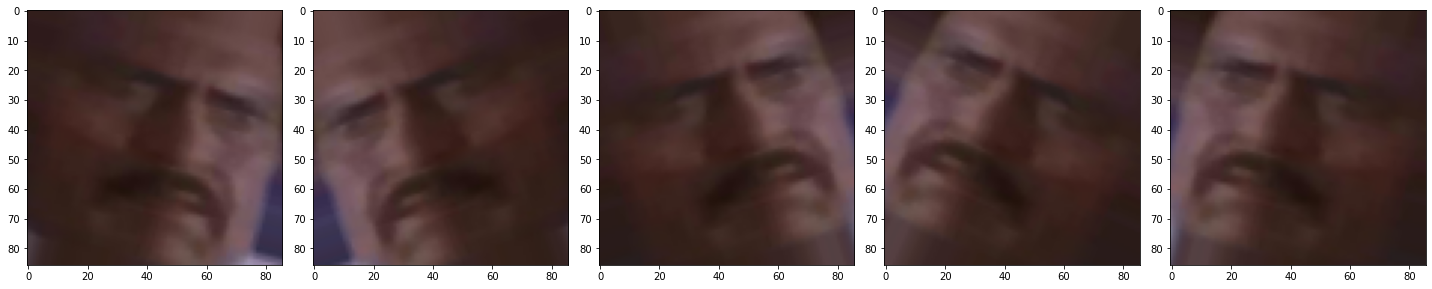

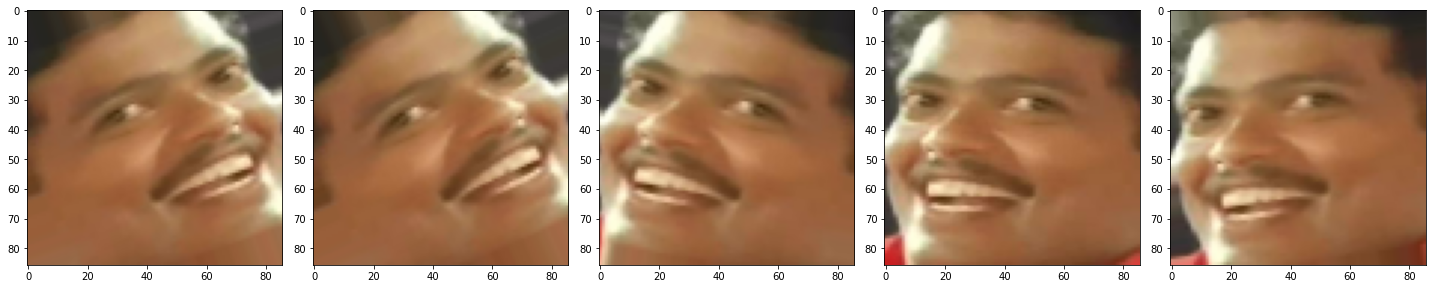

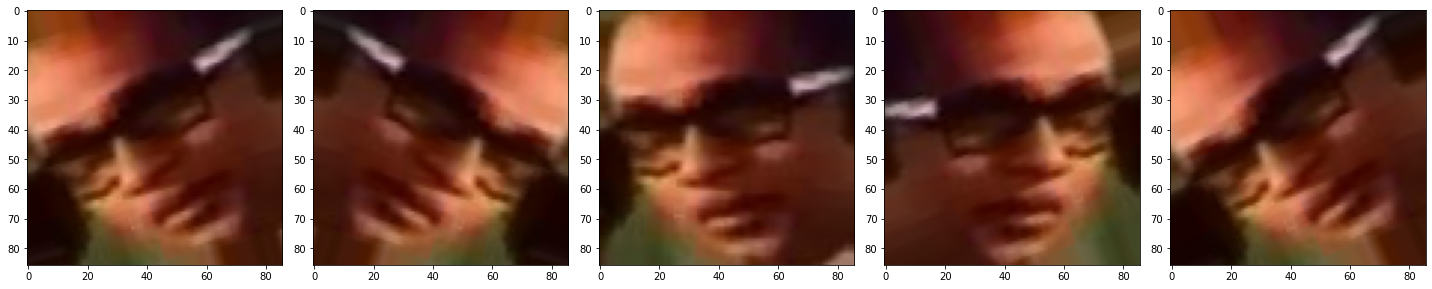

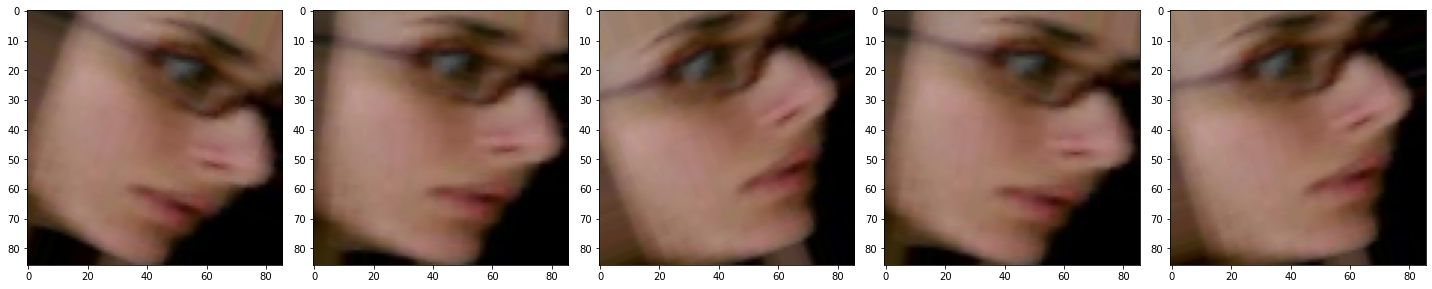

In [6]:
import matplotlib.pyplot as plt

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
    
for j in range(5,9):
    augmented_images = [train_generator[j][0][0] for i in range(5)]
    plotImages(augmented_images)

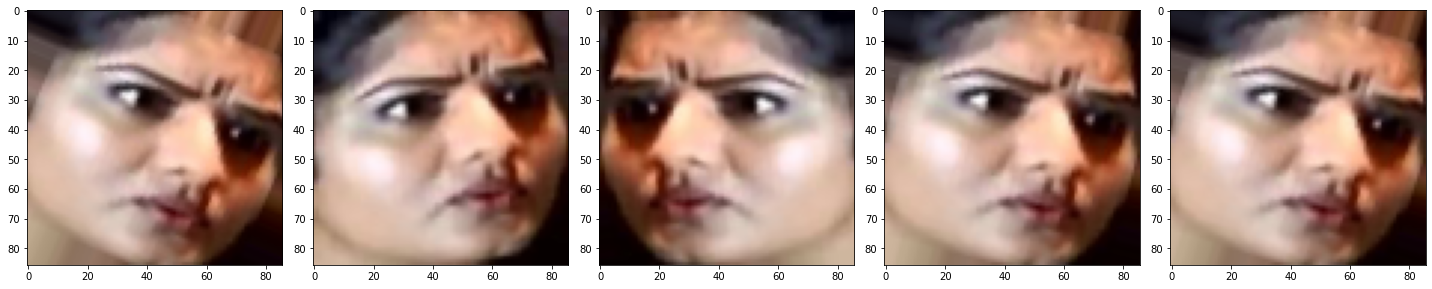

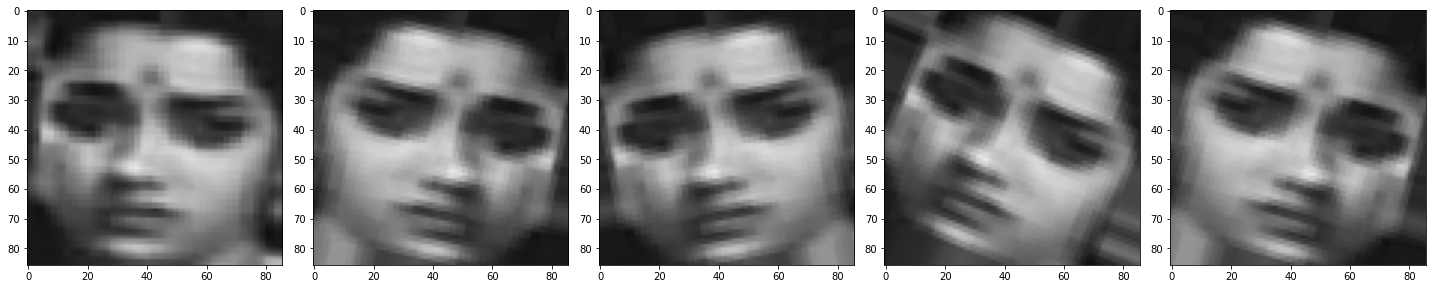

In [7]:
for j in range(61,63):
    augmented_images = [train_generator[j][0][0] for i in range(5)]
    plotImages(augmented_images)

In [8]:
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from tensorflow.keras.applications.xception import Xception

base_model_1 = Xception(weights = 'imagenet', include_top = False,input_shape=(86,86,3))


from keras.optimizers import Adam

x = base_model_1.output
x = GlobalAveragePooling2D()(x)

predictions = Dense(3, activation='softmax')(x)
    
model_1=Model(inputs=base_model_1.input,outputs=predictions)
    
model_1.compile(optimizer = Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model_1.summary() 

83689472/83683744 [==============================] - 1s 0us/step
Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 86, 86, 3)]  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 42, 42, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 42, 42, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 42, 42, 32)   0           block1_conv1_bn[0][0]            
______________________

In [9]:
### Increase the epochs for better results and also check along with validation_data

In [10]:
model_1.fit_generator(train_generator,
                      #steps_per_epoch = 14930/200,
                      #validation_data = validation_dataset,
                      #validation_split = 0.1,
                      epochs = 5,
                      verbose = 1)

Epoch 1/5
174/174 [==============================] - 124s 711ms/step - loss: 0.7571 - accuracy: 0.6663
Epoch 2/5
174/174 [==============================] - 49s 279ms/step - loss: 0.5247 - accuracy: 0.7817
Epoch 3/5
174/174 [==============================] - 49s 280ms/step - loss: 0.4003 - accuracy: 0.8378
Epoch 4/5
174/174 [==============================] - 49s 279ms/step - loss: 0.3118 - accuracy: 0.8774
Epoch 5/5
174/174 [==============================] - 49s 281ms/step - loss: 0.2399 - accuracy: 0.9086


In [11]:
import numpy as np
## prediction ###
y_pred=model_1.predict_generator(test_generator,verbose=1)

y_pred_2=np.argmax(y_pred,axis=1)

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in y_pred_2]

6636/6636 [==============================] - 51s 8ms/step


In [12]:
test_df.head()

,ID
0,25321.jpg
1,989.jpg
2,19277.jpg
3,13093.jpg
4,5367.jpg


In [13]:
test_name=test_df['ID'].values
data=pd.DataFrame((zip(test_name,predictions)),columns=['ID','Class'])

In [14]:
data

,ID,Class
0,25321.jpg,MIDDLE
1,989.jpg,MIDDLE
2,19277.jpg,MIDDLE
3,13093.jpg,MIDDLE
4,5367.jpg,MIDDLE
...,...,...
6631,1876.jpg,MIDDLE
6632,14940.jpg,MIDDLE
6633,3638.jpg,MIDDLE
6634,376.jpg,MIDDLE


In [15]:
data.to_csv('./output-FACE.csv',index=False)


In [16]:
#######    Thank you ##########